## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [10]:
#write your solution here
import pandas as pd
import matplotlib.pyplot as plt

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [11]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("/content/drive/MyDrive/12190070/goodreads.csv")


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()



4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lets read the csv file with custom column descriptions specified in the problem statement.

In [13]:
#Read the data into a dataframe specifying column names

df = pd.read_csv("/content/drive/MyDrive/12190070/goodreads.csv", names = ['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'])
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code

####### 
df.head()


rating review_count        isbn         booktype  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [14]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [15]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer :  No, there are nan values in some of the columns

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [16]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [17]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna() == True]


rating review_count  isbn booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

In [18]:
df[df.year.isna() == True]

rating review_count        isbn         booktype  \
2442    4.23          526         NaN  good_reads:book   
2869    4.61            2         NaN  good_reads:book   
3643     NaN         None        None             None   
5282     NaN         None        None             None   
5572    3.71           35  8423336603  good_reads:book   
5658    4.32           44         NaN  good_reads:book   
5683    4.56          204         NaN  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2869  https://www.goodreads.com/author/show/8182217....   NaN   
3643                                               None   NaN   
5282                                               None   NaN   
5572  https://www.goodreads.com/author/show/285658.E...   NaN   
5658  https://www.goodreads.com/author/show/25307.Ro...   NaN   
5683  https://www.goodreads.com/author/show/3097905....   NaN   

                                             genre_urls  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2869                                                NaN   
3643                                                NaN   
5282                                                NaN   
5572                                    /genres/fiction   
5658  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                    dir rating_count  \
2442                       dir25/1301625.La_Tahzan.html         4134   
2869  dir29/22031070-my-death-experiences---a-preach...           23   
3643                    dir37/9658936-harry-potter.html         None   
5282                       dir53/113138.The_Winner.html         None   
5572  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403   
5658  dir57/5533041-assassin-s-apprentice-royal-assa...         3850   
5683                  dir57/12474623-tiger-s-dream.html          895   

                                                   name  
2442                                          La Tahzan  
2869  My Death Experiences - A Preacherâs 18 Apoca...  
3643                                               None  
5282                                               None  
5572  Ãrase una vez el amor pero tuve que matarlo. ...  
5658  Assassin's Apprentice / Royal Assassin (Farsee...  
5683                 Tiger's Dream (The Tiger Saga, #5)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [19]:
df.shape

(6000, 10)

In [20]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['year','rating'], inplace=True)
df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [21]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [22]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.review_count = df.review_count.astype('int')
df.rating = df.rating.astype('int')
df.year = df.year.astype('int')

Final check

Some of the other colums that should be strings have NaN. 

In [23]:
#Insert Your code here
df.dtypes

rating           int64
review_count     int64
isbn            object
booktype        object
author_url      object
year             int64
genre_urls      object
dir             object
rating_count    object
name            object
dtype: object

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [24]:
#Get the first author_url

url = df.author_url[0]
url

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [25]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
author = url.split(".")[-1] #last list
author

'Suzanne_Collins'

In [26]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    #######
    
def get_author(url):
    author_name = url.split(".")[-1]
    return author_name
    
    

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()



rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [27]:
newdf = df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [28]:
#Get first genre_url
url_genre = newdf.genre_urls[0]
url_genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [29]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
genres = url_genre.split("/genres/")[1:]
genres

['young-adult|',
 'science-fiction|',
 'dystopia|',
 'fantasy|',
 'science-fiction|',
 'romance|',
 'adventure|',
 'book-club|',
 'young-adult|',
 'teen|',
 'apocalyptic|',
 'post-apocalyptic|',
 'action']

In [30]:
#List comprihension rather than loop
newgenres = [genre.replace("|","") for genre in genres]
newgenres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [31]:
#storing it in string format.
genres = "|".join(newgenres)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [32]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    #######
def get_genre(url):
        genres = url.split("/genres/")[1:]
        newgenre = [genre.replace("|","") for genre in genres]
        genres = "|".join(newgenre)
        return genres


newdf['Genres'] = newdf.genre_urls.map(get_genre)
newdf.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [33]:
#Determine best book using review_count 
yeardf = df.groupby('year', sort=False)
yeardf

In [34]:
yeardf.size()

year
2008    254
2003    166
2005    200
1960     17
1813      1
       ... 
1391      1
1621      1
1589      1
1106      1
1140      1
Length: 293, dtype: int64

Try this for few other definitions of the "best book" using `.groupby`.

In [35]:
#first record from each group
yeardf.first()


rating  review_count        isbn         booktype  \
year                                                      
2008       4        136455  0439023483  good_reads:book   
2003       4         16648  0439358078  good_reads:book   
2005       3         85746  0316015849  good_reads:book   
1960       4         47906  0061120081  good_reads:book   
1813       4         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1391       3           427  0141183721  good_reads:book   
1621       4            83  0940322668  good_reads:book   
1589       3           667  0671722921  good_reads:book   
1106       3           134  0192803735  good_reads:book   
1140       3           118  8489163936  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/153394.S...   
2003  https://www.goodreads.com/author/show/1077326....   
2005  https://www.goodreads.com/author/show/941441.S...   
1960  https://www.goodreads.com/author/show/1825.Har...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                             genre_urls  \
year                                                      
2008  /genres/young-adult|/genres/science-fiction|/g...   
2003  /genres/fantasy|/genres/young-adult|/genres/fi...   
2005  /genres/young-adult|/genres/fantasy|/genres/ro...   
1960  /genres/classics|/genres/fiction|/genres/histo...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1391  /genres/fiction|/genres/classics|/genres/liter...   
1621  /genres/psychology|/genres/philosophy|/genres/...   
1589  /genres/plays|/genres/classics|/genres/drama|/...   
1106  /genres/fantasy|/genres/mythology|/genres/clas...   
1140  /genres/poetry|/genres/classics|/genres/europe...   

                                                    dir rating_count  \
year                                                                   
2008                dir01/2767052-the-hunger-games.html      2958974   
2003  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2005                          dir01/41865.Twilight.html      2579564   
1960              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
1813                dir01/1885.Pride_and_Prejudice.html      1388992   
...                                                 ...          ...   
1391         dir56/9648.Keep_the_Aspidistra_Flying.html         7029   
1621        dir56/557658.The_Anatomy_of_Melancholy.html          720   
1589                  dir58/72978.Titus_Andronicus.html        13070   
1106                          dir58/75586.The_T_in.html         1988   
1140                  dir59/73419.Poema_de_M_o_Cid.html         3463   

                                                   name               author  
year                                                                          
2008            The Hunger Games (The Hunger Games, #1)      Suzanne_Collins  
2003  Harry Potter and the Order of the Phoenix (Har...          J_K_Rowling  
2005                            Twilight (Twilight, #1)      Stephenie_Meyer  
1960                              To Kill a Mockingbird           Harper_Lee  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1391                         Keep the Aspidistra Flying        George_Orwell  
1621                          The Anatomy of Melanchol

In [36]:
#Last record from each group
yeardf.last()

rating  review_count        isbn         booktype  \
year                                                      
2008       3           496  0618754458  good_reads:book   
2003       3          1693  0312424442  good_reads:book   
2005       4          2226  0767913736  good_reads:book   
1960       4           460  0393048470  good_reads:book   
1813       4         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1391       3           427  0141183721  good_reads:book   
1621       4            83  0940322668  good_reads:book   
1589       3           667  0671722921  good_reads:book   
1106       3           134  0192803735  good_reads:book   
1140       3           118  8489163936  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/26256.Ma...   
2003  https://www.goodreads.com/author/show/3083854....   
2005  https://www.goodreads.com/author/show/44565.Ca...   
1960  https://www.goodreads.com/author/show/8164.Lew...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                             genre_urls  \
year                                                      
2008  /genres/autobiography|/genres/memoir|/genres/n...   
2003  /genres/fiction|/genres/novels|/genres/contemp...   
2005  /genres/history|/genres/non-fiction|/genres/bi...   
1960  /genres/classics|/genres/fiction|/genres/fanta...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1391  /genres/fiction|/genres/classics|/genres/liter...   
1621  /genres/psychology|/genres/philosophy|/genres/...   
1589  /genres/plays|/genres/classics|/genres/drama|/...   
1106  /genres/fantasy|/genres/mythology|/genres/clas...   
1140  /genres/poetry|/genres/classics|/genres/europe...   

                                              dir rating_count  \
year                                                             
2008                   dir60/2177563.Madness.html         6732   
2003        dir60/231.I_am_Charlotte_Simmons.html        17743   
2005          dir60/78508.The_River_of_Doubt.html        16618   
1960        dir60/176972.The_Annotated_Alice.html         5312   
1813          dir01/1885.Pride_and_Prejudice.html      1388992   
...                                           ...          ...   
1391   dir56/9648.Keep_the_Aspidistra_Flying.html         7029   
1621  dir56/557658.The_Anatomy_of_Melancholy.html          720   
1589            dir58/72978.Titus_Andronicus.html        13070   
1106                    dir58/75586.The_T_in.html         1988   
1140            dir59/73419.Poema_de_M_o_Cid.html         3463   

                            name               author  
year                                                   
2008                     Madness     Marya_Hornbacher  
2003      I am Charlotte Simmons            Tom_Wolfe  
2005          The River of Doubt      Candice_Millard  
1960         The Annotated Alice        Lewis_Carroll  
1813         Pride and Prejudice          Jane_Austen  
...                          ...                  ...  
1391  Keep the Aspidistra Flying        George_Orwell  
1621   The Anatomy of Melancholy        Robert_Burton  
1589            Titus Andronicus  William_Shakespeare  
1106                   The TÃ¡in            Anonymous  
1140           Poema de MÃ­o Cid            Anonymous  

[293 rows x 10 columns]

In [37]:
yeardf.groups

{2008: [0, 127, 138, 188, 195, 198, 289, 309, 337, 343, 368, 380, 383, 422, 434, 459, 471, 478, 479, 483, 501, 544, 584, 653, 657, 663, 698, 730, 738, 751, 763, 805, 825, 840, 847, 862, 902, 937, 941, 943, 959, 1005, 1024, 1025, 1057, 1061, 1090, 1095, 1137, 1142, 1150, 1172, 1262, 1328, 1401, 1414, 1420, 1425, 1472, 1531, 1545, 1568, 1585, 1598, 1602, 1615, 1635, 1778, 1808, 1832, 1861, 1862, 1890, 1901, 1904, 1905, 1918, 1988, 2007, 2008, 2040, 2047, 2049, 2058, 2083, 2088, 2136, 2149, 2158, 2164, 2189, 2193, 2237, 2258, 2288, 2293, 2302, 2321, 2348, 2363, ...], 2003: [1, 11, 16, 113, 115, 238, 286, 297, 376, 435, 442, 470, 555, 574, 590, 630, 640, 690, 757, 784, 811, 856, 898, 987, 1044, 1146, 1213, 1221, 1240, 1312, 1356, 1363, 1380, 1415, 1470, 1503, 1520, 1564, 1571, 1619, 1675, 1780, 1817, 1859, 1883, 1910, 1920, 1955, 1983, 2031, 2066, 2105, 2131, 2213, 2226, 2252, 2254, 2327, 2356, 2396, 2447, 2453, 2457, 2462, 2569, 2571, 2603, 2604, 2661, 2666, 2671, 2702, 2809, 2827, 2856, 

In [38]:
yeardf.get_group(2008)

rating  review_count        isbn         booktype  \
0          4        136455  0439023483  good_reads:book   
127        4          7508  1595141979  good_reads:book   
138        4          7460  1595141758  good_reads:book   
188        4          8996  1423101464  good_reads:book   
195        4          8630         NaN  good_reads:book   
...      ...           ...         ...              ...   
5860       4            62  055338564X  good_reads:book   
5866       4           350         NaN  good_reads:book   
5890       3          1585  0553807056  good_reads:book   
5891       4           637  0553805096  good_reads:book   
5913       3           496  0618754458  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
127   https://www.goodreads.com/author/show/137902.R...  2008   
138   https://www.goodreads.com/author/show/137902.R...  2008   
188   https://www.goodreads.com/author/show/15872.Ri...  2008   
195   https://www.goodreads.com/author/show/941441.S...  2008   
...                                                 ...   ...   
5860  https://www.goodreads.com/author/show/396931.C...  2008   
5866  https://www.goodreads.com/author/show/696355.I...  2008   
5890  https://www.goodreads.com/author/show/9355.Dea...  2008   
5891  https://www.goodreads.com/author/show/933665.A...  2008   
5913  https://www.goodreads.com/author/show/26256.Ma...  2008   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
127   /genres/paranormal|/genres/vampires|/genres/fa...   
138   /genres/paranormal|/genres/vampires|/genres/yo...   
188   /genres/young-adult|/genres/fantasy|/genres/my...   
195   /genres/young-adult|/genres/paranormal|/genres...   
...                                                 ...   
5860  /genres/fiction|/genres/fantasy|/genres/cultur...   
5866  /genres/romance|/genres/asian-literature|/genr...   
5890  /genres/horror|/genres/fiction|/genres/thrille...   
5891  /genres/biography|/genres/business|/genres/non...   
5913  /genres/autobiography|/genres/memoir|/genres/n...   

                                                    dir rating_count  \
0                   dir01/2767052-the-hunger-games.html      2958974   
127                      dir02/2802316-shadow-kiss.html       184786   
138                        dir02/2282133.Frostbite.html       193452   
188      dir02/2120932.The_Battle_of_the_Labyrinth.html       360183   
195                     dir02/4502877-midnight-sun.html       124018   
...                                                 ...          ...   
5860  dir59/4717491-the-love-we-share-without-knowin...          346   
5866                 dir59/4566934-winter-in-tokyo.html         5705   
5890                       dir59/2029927.Odd_Hours.html        26367   
5891                    dir59/2054761.The_Snowball.html        12532   
5913                         dir60/2177563.Madness.html         6732   

                                                   name              author  
0               The Hunger Games (The Hunger Games, #1)     Suzanne_Collins  
127                   Shadow Kiss (Vampire Academy, #3)       Richelle_Mead  
138                     Frostbite (Vampire Academy, #2)       Richelle_Mead  
188   The Battle of the Labyrinth (Percy Jackson and...        Rick_Riordan  
195                       Midnight Sun (Twilight, #1.5)     Stephenie_Meyer  
...                                                 ...                 ...  
5860                  The Love We Share Without Knowing  Christopher_Barzak  
5866                                    Winter in Tokyo           Ilana_Tan  
5890                         Odd Hours (Odd Thomas, #4)         Dean_Koontz  
5891                                       The Snowball     Alice_Schroeder  
5913                                            Madness    Marya_Hornbacher  

[254 

In [39]:
#maximum value from each group
yeardf.max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


rating  review_count         booktype  \
year                                          
2008       4        136455  good_reads:book   
2003       4         38061  good_reads:book   
2005       4         85746  good_reads:book   
1960       4         47906  good_reads:book   
1813       4         34772  good_reads:book   
...      ...           ...              ...   
1391       3           427  good_reads:book   
1621       4            83  good_reads:book   
1589       3           667  good_reads:book   
1106       3           134  good_reads:book   
1140       3           118  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/9987.Phi...   
2003  https://www.goodreads.com/author/show/9987.Phi...   
2005  https://www.goodreads.com/author/show/9987.Phi...   
1960  https://www.goodreads.com/author/show/8164.Lew...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                              dir rating_count  \
year                                                             
2008                   dir60/2177563.Madness.html         9774   
2003        dir60/231.I_am_Charlotte_Simmons.html         9523   
2005          dir60/78508.The_River_of_Doubt.html         9968   
1960         dir60/211953.Mistress_of_Mellyn.html        96780   
1813          dir01/1885.Pride_and_Prejudice.html      1388992   
...                                           ...          ...   
1391   dir56/9648.Keep_the_Aspidistra_Flying.html         7029   
1621  dir56/557658.The_Anatomy_of_Melancholy.html          720   
1589            dir58/72978.Titus_Andronicus.html        13070   
1106                    dir58/75586.The_T_in.html         1988   
1140            dir59/73419.Poema_de_M_o_Cid.html         3463   

                            name               author  
year                                                   
2008              Ù¡/Ù¤ Ø¬Ø±Ø§Ù
                    _  
2003               ÙØ§ ØªØ­Ø²Ù       William_Gibson  
2005                       Zorro          Zadie_Smith  
1960  Whip Hand (Sid Halley, #2)         Walker_Percy  
1813         Pride and Prejudice          Jane_Austen  
...                          ...                  ...  
1391  Keep the Aspidistra Flying        George_Orwell  
1621   The Anatomy of Melancholy        Robert_Burton  
1589            Titus Andronicus  William_Shakespeare  
1106                   The TÃ¡in            Anonymous  
1140           Poema de MÃ­o Cid            Anonymous  

[293 rows x 8 columns]

In [40]:
yeardf.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


rating  review_count         booktype  \
year                                          
2008       3             7  good_reads:book   
2003       3            10  good_reads:book   
2005       3             5  good_reads:book   
1960       3            64  good_reads:book   
1813       4         34772  good_reads:book   
...      ...           ...              ...   
1391       3           427  good_reads:book   
1621       4            83  good_reads:book   
1589       3           667  good_reads:book   
1106       3           134  good_reads:book   
1140       3           118  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/10015.Ka...   
2003  https://www.goodreads.com/author/show/10289.De...   
2005  https://www.goodreads.com/author/show/100752.D...   
1960  https://www.goodreads.com/author/show/12584.E_...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                               dir rating_count  \
year                                                              
2008           dir01/2767052-the-hunger-games.html        10017   
2003  dir01/18619684-the-time-traveler-s-wife.html        10017   
2005               dir01/19063.The_Book_Thief.html        10057   
1960           dir01/23772.Green_Eggs_and_Ham.html       107477   
1813           dir01/1885.Pride_and_Prejudice.html      1388992   
...                                            ...          ...   
1391    dir56/9648.Keep_the_Aspidistra_Flying.html         7029   
1621   dir56/557658.The_Anatomy_of_Melancholy.html          720   
1589             dir58/72978.Titus_Andronicus.html        13070   
1106                     dir58/75586.The_T_in.html         1988   
1140             dir59/73419.Poema_de_M_o_Cid.html         3463   

                                               name               author  
year                                                                      
2008                          172 Hours on the Moon         Abigail_Roux  
2003  A Great and Terrible Beauty (Gemma Doyle, #1)        A_id_al_Qarni  
2005                                    102 Minutes       Aidan_Chambers  
1960                             Are You My Mother?         Dick_Francis  
1813                            Pride and Prejudice          Jane_Austen  
...                                             ...                  ...  
1391                     Keep the Aspidistra Flying        George_Orwell  
1621                      The Anatomy of Melancholy        Robert_Burton  
1589                               Titus Andronicus  William_Shakespeare  
1106                                      The TÃ¡in            Anonymous  
1140                              Poema de MÃ­o Cid            Anonymous  

[293 rows x 8 columns]

In [41]:
yeardf.mean()

rating  review_count
year                        
2008  3.551181   3227.248031
2003  3.493976   2495.873494
2005  3.485000   3536.580000
1960  3.647059   4013.294118
1813  4.000000  34772.000000
...        ...           ...
1391  3.000000    427.000000
1621  4.000000     83.000000
1589  3.000000    667.000000
1106  3.000000    134.000000
1140  3.000000    118.000000

[293 rows x 2 columns]

In [42]:
 #applying methods to particular rows
yeardf['review_count'].mean()

year
2008     3227.248031
2003     2495.873494
2005     3536.580000
1960     4013.294118
1813    34772.000000
            ...     
1391      427.000000
1621       83.000000
1589      667.000000
1106      134.000000
1140      118.000000
Name: review_count, Length: 293, dtype: float64

In [43]:
#applying to methods to multiple columns.
yeardf[['rating','review_count']].mean()

rating  review_count
year                        
2008  3.551181   3227.248031
2003  3.493976   2495.873494
2005  3.485000   3536.580000
1960  3.647059   4013.294118
1813  4.000000  34772.000000
...        ...           ...
1391  3.000000    427.000000
1621  4.000000     83.000000
1589  3.000000    667.000000
1106  3.000000    134.000000
1140  3.000000    118.000000

[293 rows x 2 columns]

In [44]:
 #pass dictionary to apply appropriate aggregation function to each feature/column
yeardf.agg({"rating":'max','review_count':'mean'})

rating  review_count
year                      
2008       4   3227.248031
2003       4   2495.873494
2005       4   3536.580000
1960       4   4013.294118
1813       4  34772.000000
...      ...           ...
1391       3    427.000000
1621       4     83.000000
1589       3    667.000000
1106       3    134.000000
1140       3    118.000000

[293 rows x 2 columns]

In [45]:
 #pass list to apply multiple aggregation function at once.
yeardf.agg(['mean','median','max'])

rating             review_count                   rating_count  \
          mean median max          mean   median     max          mean   
year                                                                     
2008  3.551181    4.0   4   3227.248031   1315.0  136455           inf   
2003  3.493976    3.0   4   2495.873494    913.0   38061           inf   
2005  3.485000    3.0   4   3536.580000   1119.0   85746           inf   
1960  3.647059    4.0   4   4013.294118    699.0   47906  1.222426e+80   
1813  4.000000    4.0   4  34772.000000  34772.0   34772  1.388992e+06   
...        ...    ...  ..           ...      ...     ...           ...   
1391  3.000000    3.0   3    427.000000    427.0     427  7.029000e+03   
1621  4.000000    4.0   4     83.000000     83.0      83  7.200000e+02   
1589  3.000000    3.0   3    667.000000    667.0     667  1.307000e+04   
1106  3.000000    3.0   3    134.000000    134.0     134  1.988000e+03   
1140  3.000000    3.0   3    118.000000    118.0     118  3.463000e+03   

                          
         median      max  
year                      
2008    19063.0     9774  
2003    19315.5     9523  
2005    20416.0     9968  
1960    24142.0    96780  
1813  1388992.0  1388992  
...         ...      ...  
1391     7029.0     7029  
1621      720.0      720  
1589    13070.0    13070  
1106     1988.0     1988  
1140     3463.0     3463  

[293 rows x 9 columns]

In [46]:
#use for loops to iterate through groups
for group_name,group in yeardf:
    print(group_name)

2008
2003
2005
1960
1813
1936
1949
1964
1945
1979
1997
1865
1597
1862
1973
1954
1985
1890
1866
1952
1908
1988
1953
2012
1937
1962
1897
1932
2009
1967
1847
1963
1884
2002
2007
1911
2006
2011
1859
2001
-800
1877
1955
1969
1961
1989
1951
1972
1925
1978
2004
1818
1861
1943
1892
1996
1998
1938
1982
1880
1940
1957
1991
1999
1922
1605
1851
1868
1976
1993
1995
1975
1926
1876
1981
1994
1850
1942
1977
1980
1965
1959
1915
1986
1939
1321
1900
1928
2000
1902
1931
1971
1895
1891
1983
1923
1843
1595
1899
1970
1390
1920
1856
1990
1929
1903
1839
2010
1883
1992
1950
1987
1905
1946
1958
1910
1934
1603
1844
1855
1667
1852
1759
1854
1869
1623
2013
1916
1872
632
1933
1930
1974
1726
1918
800
1814
1901
1906
1968
1924
1314
1947
1787
1532
1831
1719
1927
1914
1984
1944
1817
1853
-380
1948
1860
1601
1913
1599
1886
1874
1966
1935
1600
1898
1909
1919
900
1823
-29
1956
1881
1830
-429
1819
1889
-512
1798
1894
-500
1794
1590
-442
1609
1870
1812
1008
1826
1879
1678
1774
2014
1348
1611
1825
1873
1848
1845
1767
1885
1864

In [47]:
for key, valdf in yeardf:
    result = valdf[valdf['review_count'] == valdf.review_count.max()]
    print(result.name, result.year, result.review_count)

0    The Hunger Games (The Hunger Games, #1)
Name: name, dtype: object 0    2008
Name: year, dtype: int64 0    136455
Name: review_count, dtype: int64
16    The Time Traveler's Wife
Name: name, dtype: object 16    2003
Name: year, dtype: int64 16    38061
Name: review_count, dtype: int64
2    Twilight (Twilight, #1)
Name: name, dtype: object 2    2005
Name: year, dtype: int64 2    85746
Name: review_count, dtype: int64
3    To Kill a Mockingbird
Name: name, dtype: object 3    1960
Name: year, dtype: int64 3    47906
Name: review_count, dtype: int64
4    Pride and Prejudice
Name: name, dtype: object 4    1813
Name: year, dtype: int64 4    34772
Name: review_count, dtype: int64
5    Gone with the Wind
Name: name, dtype: object 5    1936
Name: year, dtype: int64 5    12363
Name: review_count, dtype: int64
1047    1984
Name: name, dtype: object 1047    1949
Name: year, dtype: int64 1047    26946
Name: review_count, dtype: int64
7    The Giving Tree
Name: name, dtype: object 7    1964
Name:

I took year and review_count columns to determine the best book. The best book has been determined by grouping the years and determining which book has the higest review_count in that particular year. 

The above output shows the name,year and review_count of the movies which has the higest review_count in each year.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [48]:
newdf.head()

rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [49]:
genre_set=set()
for genre in newdf.Genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

537

In [50]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 



In [51]:
#to add columns
for genre in genre_set:
    newdf[genre] = [genre in row.split("|") for row in newdf.Genres]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


rating  review_count        isbn         booktype  \
0       4        136455  0439023483  good_reads:book   
1       4         16648  0439358078  good_reads:book   
2       3         85746  0316015849  good_reads:book   
3       4         47906  0061120081  good_reads:book   
4       4         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  ... spy-thriller  \
0            The Hunger Games (The Hunger Games, #1)  ...        False   
1  Harry Potter and the Order of the Phoenix (Har...  ...        False   
2                            Twilight (Twilight, #1)  ...        False   
3                              To Kill a Mockingbird  ...        False   
4                                Pride and Prejudice  ...        False   

  cult-classics  contemporary-romance  writing  religion  drawing  suspense  \
0         False                 False    False     False    False     False   
1         False                 False    False     False    False     False   
2         False                 False    False     False    False     False   
3         False                 False    False     False    False     False   
4         False                 False    False     False    False     False   

   erotic-romance  young-adult-paranormal  islam  
0           False                   False  False  
1           False                   False  False  
2           False                   False  False  
3           False                   False  False  
4           False                   False  False  

[5 rows x 549 columns]

In [52]:
newdf.shape

(5934, 549)

In [53]:
genredf = newdf[list(genre_set)]
genredf.head()

magical-realism  magic  military  young-adult-romance  art-history  \
0            False  False     False                False        False   
1            False   True     False                False        False   
2            False  False     False                False        False   
3            False  False     False                False        False   
4            False  False     False                False        False   

   cooking  surreal  sweden  physics  music  ...  spy-thriller  cult-classics  \
0    False    False   False    False  False  ...         False          False   
1    False    False   False    False  False  ...         False          False   
2    False    False   False    False  False  ...         False          False   
3    False    False   False    False  False  ...         False          False   
4    False    False   False    False  False  ...         False          False   

   contemporary-romance  writing  religion  drawing  suspense  erotic-romance  \
0                 False    False     False    False     False           False   
1                 False    False     False    False     False           False   
2                 False    False     False    False     False           False   
3                 False    False     False    False     False           False   
4                 False    False     False    False     False           False   

   young-adult-paranormal  islam  
0                   False  False  
1                   False  False  
2                   False  False  
3                   False  False  
4                   False  False  

[5 rows x 537 columns]

In [54]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:20]
y = result[:20]

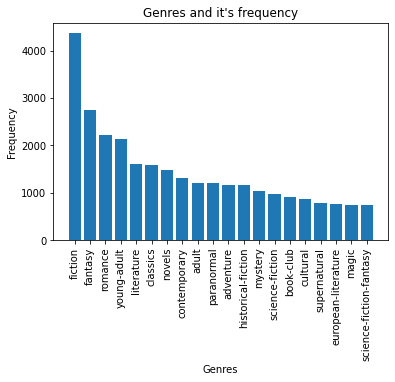

In [55]:
# plot the data here
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()